In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
xx = ROOT.RooRealVar("xx","xx",0,1)
yy = ROOT.RooRealVar("yy","yy",0,1)

In [3]:
bkg = Models.PolyPos2D_pdf("bkg",xvar=xx,yvar=yy,nx=1,ny=1)

In [4]:
print(bkg)

PolyPos2D_pdf(bkg,xvar=xx,yvar=yy)


In [5]:
print(bkg.phi_list)

['phi0_bkg:0.0', 'phi1_bkg:0.0', 'phi2_bkg:0.0']


In [6]:
bkg.phis[0].setVal(1)
bkg.phis[1].setVal(0.5)
bkg.phis[2].setVal(2)
print(bkg.phis[0])
print(bkg.phis[1])
print(bkg.phis[2])

'phi0_bkg' : ( 1 +- 0 ) 
'phi1_bkg' : ( 0.5 +- 0 ) 
'phi2_bkg' : ( 2 +- 0 ) 


In [38]:
ds = bkg.generate(2000)
print(ds)

+---------------+---------------+----------+---------+-------------+----------+
|   Variable    |  Description  |   mean   |   rms   |     min     |   max    |
+---------------+---------------+----------+---------+-------------+----------+
| 1. xx         | xx            | +0.40356 | 0.27057 | +0.00014837 | +0.99894 |
| 2. yy         | yy            | +0.64092 | 0.25166 |  +0.0016462 | +0.99997 |
+---------------+---------------+----------+---------+-------------+----------+


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


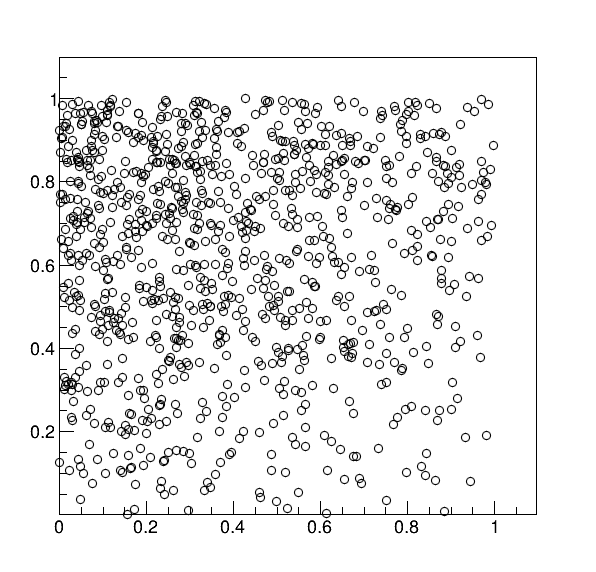

In [39]:
x_bkg = []
y_bkg = []
for entry in ds:
    x_bkg.append(entry.xx.value)
    y_bkg.append(entry.yy.value)
graph_bkg = makeGraph(x_list,y_list)
graph_bkg.SetMarkerStyle(24)
graph_bkg.SetTitle("")
canv = ROOT.TCanvas("canv","canv",600,600)
graph_bkg.Draw("AP")
canv.Draw()

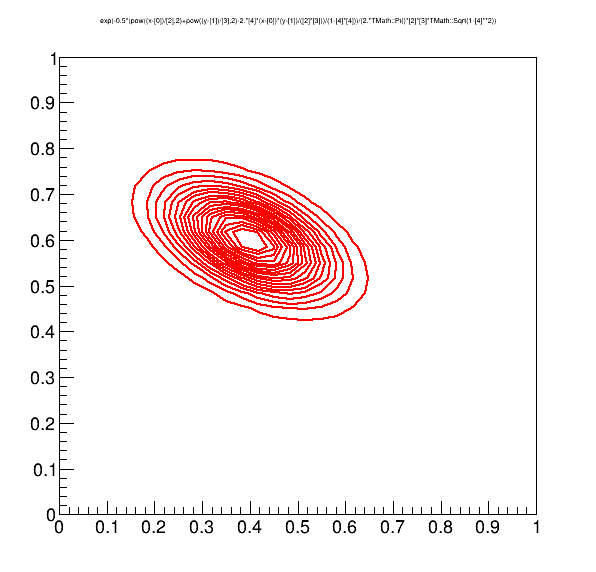

In [40]:
sig_tf2 = ROOT.TF2("sig_tf2","exp(-0.5*(pow((x-[0])/[2],2)+pow((y-[1])/[3],2)-2.*[4]*(x-[0])*(y-[1])/([2]*[3]))/(1-[4]*[4]))/(2.*TMath::Pi()*[2]*[3]*TMath::Sqrt(1-[4]**2))",0,1,0,1)
sig_tf2.SetParameter(0,0.4)
sig_tf2.SetParameter(1,0.6)
sig_tf2.SetParameter(2,0.1)
sig_tf2.SetParameter(3,0.07)
sig_tf2.SetParameter(4,-0.5)
sig_tf2.Draw()
canv.Draw()

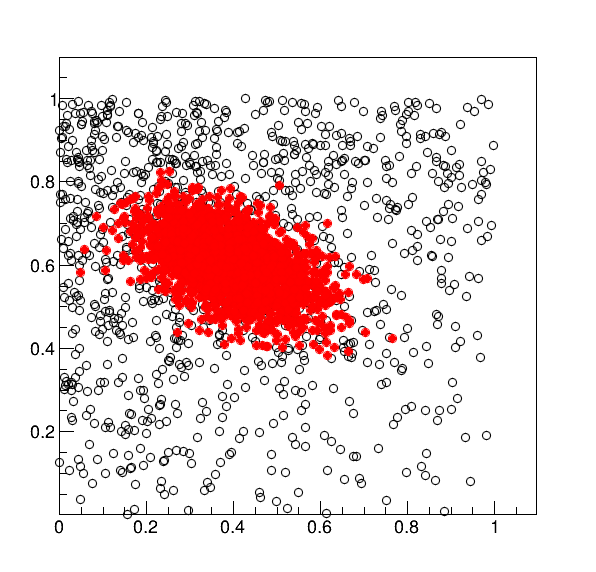

In [41]:
x_sig = []
y_sig = []
import ctypes
for i in range(2000):
    xref = ctypes.c_double()
    yref = ctypes.c_double()
    sig_tf2.GetRandom2(xref,yref)
    x_sig.append(xref.value)
    y_sig.append(yref.value)
    #print(str(xref.value) + "\t"+str(yref.value))
graph_sig = makeGraph(x_sig,y_sig)
graph_sig.SetMarkerStyle(20)
graph_sig.SetMarkerColor(2)
graph_sig.SetTitle("")
graph_bkg.Draw("AP")
graph_sig.Draw("same P")
canv.Draw()

In [42]:
import ostap.io.root_file
from array import array


In [43]:
vx = array ( 'd', [ 0 ] )
vy = array ( 'd', [ 0 ] )

In [44]:
from ostap.core.core import ROOTCWD

In [45]:
with ROOTCWD() , ROOT.TFile.Open( "sig.root" , "RECREATE" ) as root_file:
    root_file.cd ()
    treeS = ROOT.TTree ( 'treeS','treeS' )
    treeS.SetDirectory ( root_file  )
    treeS.Branch ( 'vx' , vx , 'vx/D'  )
    treeS.Branch ( 'vy' , vy , 'vy/D' )
    for i in range(1000):
        vx[0] = x_sig[i]
        vy[0] = y_sig[i]
        treeS.Fill()
    root_file.Write()

In [46]:
with ROOTCWD() , ROOT.TFile.Open( "bkg.root" , "RECREATE" ) as root_file:
    root_file.cd ()
    treeB = ROOT.TTree ( 'treeB','treeB' )
    treeB.SetDirectory ( root_file  )
    treeB.Branch ( 'vx' , vx , 'vx/D'  )
    treeB.Branch ( 'vy' , vy , 'vy/D' )
    for i in range(1000):
        vx[0] = x_bkg[i]
        vy[0] = y_bkg[i]
        treeB.Fill()
    root_file.Write()

In [48]:
tr = array("d",[0])
with ROOTCWD() , ROOT.TFile.Open( "mix.root" , "RECREATE" ) as root_file:
    root_file.cd ()
    treeM = ROOT.TTree ( 'treeM','treeM' )
    treeM.SetDirectory ( root_file  )
    treeM.Branch ( 'vx' , vx , 'vx/D' )
    treeM.Branch ( 'vy' , vy , 'vy/D' )
    treeM.Branch ( 'tr' , tr , 'tr/D' )
    for i in range(1000,2000):
        vx[0] = x_bkg[i]
        vy[0] = y_bkg[i]
        tr[0] = 0.
        treeM.Fill()
    for i in range(1000,2000):
        vx[0] = x_sig[i]
        vy[0] = y_sig[i]
        tr[0] = 1.
        treeM.Fill()
    root_file.Write()